In [1]:
import torch

epochs = 100
lr = 0.00001
train_batch_size = 32
test_batch_size = 1
ck_dir = 'checkpoint/flooding'
device = torch.device('cuda:0')

In [2]:
TRAIN_PATH = './skin_leison/training'
TEST_PATH = './skin_leison/testing'

In [3]:
from torch.utils.data import DataLoader

from dataset import Skin_Leison

trainset = Skin_Leison(TRAIN_PATH)
testset = Skin_Leison(TEST_PATH)
trainloader = DataLoader(trainset, batch_size=train_batch_size, shuffle=True, num_workers=4)
testloader = DataLoader(testset, batch_size=test_batch_size, num_workers=4)

In [4]:
from torch import nn
from torch.optim import Adam

from models.Unet import Unet

net = Unet(3, 1, 64, 4).to(device)
optimizer = Adam(net.parameters(), lr=lr)
criterion = nn.BCELoss()

In [5]:
from train import train

result = train(net, trainloader, testloader, epochs, optimizer, criterion, device=device, ck_dir=ck_dir, flooding=0.1)

Epoch: 0, Train Loss: 0.6539475464820862, Test Loss: 0.6255554839968677
Saving model to checkpoint/flooding/check0.pt
Epoch: 1, Train Loss: 0.5407772707939149, Test Loss: 0.4765342371165756
val_loss improved from 0.6256 to 0.4765, saving model to checkpoint/flooding/check1.pt
Epoch: 2, Train Loss: 0.47965879321098337, Test Loss: 0.42037742331624034
val_loss improved from 0.4765 to 0.4204, saving model to checkpoint/flooding/check2.pt
Epoch: 3, Train Loss: 0.42930035948753364, Test Loss: 0.3727066616714001
val_loss improved from 0.4204 to 0.3727, saving model to checkpoint/flooding/check3.pt
Epoch: 4, Train Loss: 0.3740816843509674, Test Loss: 0.3371246027946471
val_loss improved from 0.3727 to 0.3371, saving model to checkpoint/flooding/check4.pt
Epoch: 5, Train Loss: 0.324845073223114, Test Loss: 0.32175828963518127
val_loss improved from 0.3371 to 0.3218, saving model to checkpoint/flooding/check5.pt
Epoch: 6, Train Loss: 0.286403968334198, Test Loss: 0.281686166487634
val_loss impro

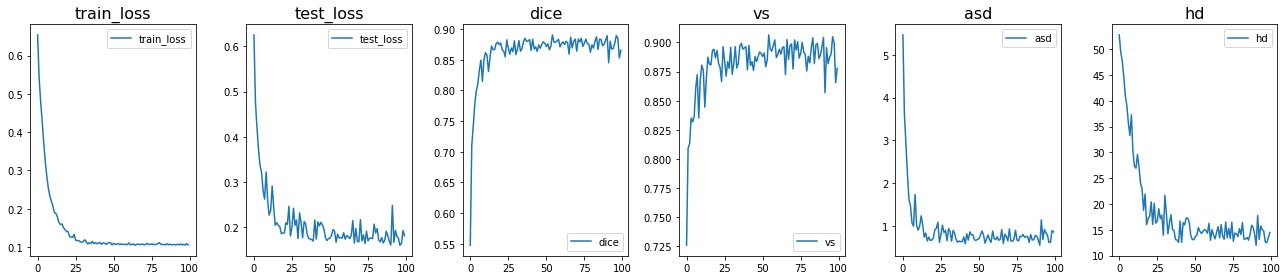

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18,4))
keys = ['train_loss', 'test_loss', 'dice', 'vs', 'asd', 'hd']
for i, (col, key) in enumerate(zip(axes, keys)):
    col.plot(range(len(result[key])), result[key], label=key)
    col.set_title(key, fontsize=16)
    col.legend()
fig.tight_layout()

In [7]:
import json
from pathlib import Path

json_path = Path(ck_dir)/'result.json'
json_path.parent.mkdir(parents=True, exist_ok=True)
with open(json_path, 'w') as fp:
    json.dump(result, fp, sort_keys=True, indent=4)